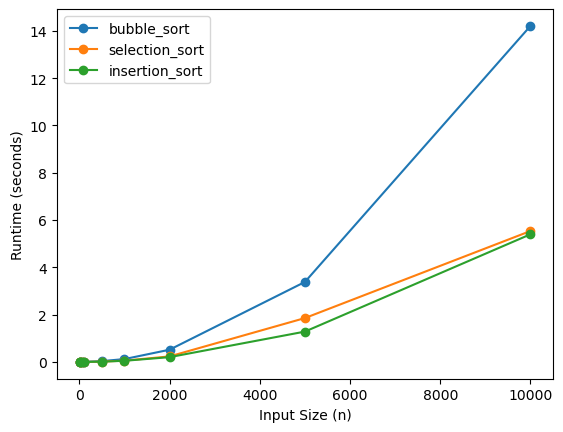

Input Size (n)    bubble_sort            selection_sort         insertion_sort         
5                 0.0                    0.0                    0.0                    
10                0.0                    0.0                    0.0                    
50                0.0009996891021728516   0.0                    0.0                    
100               0.0020041465759277344   0.0                    0.0010004043579101562   
500               0.03502178192138672    0.013008832931518555   0.011007308959960938   
1000              0.12010359764099121    0.054146528244018555   0.0480341911315918     
2000              0.5164613723754883     0.23321533203125       0.20223426818847656    
5000              3.3817498683929443     1.8547999858856201     1.282522439956665      
10000             14.209780216217041     5.536294937133789      5.398208856582642      


In [4]:
import time
import matplotlib.pyplot as plt
import numpy as np

def generate_random_array(size):
    return np.random.randint(1, 1000, size=size).tolist()

def bubble_sort(list1):
    for i in range(0, len(list1)-1):
        for j in range(0, len(list1)-1-i):
            if list1[j] > list1[j+1]:
                list1[j], list1[j + 1] = list1[j + 1], list1[j]  # swapping if the element is greater than the next element
    return list1

def selection_sort(list1):
    for i in range(len(list1)):
        min_value = i
        for j in range(i+1, len(list1)):
            if list1[j] < list1[min_value]:
                min_value = j
        list1[i], list1[min_value] = list1[min_value], list1[i]  # swapping minimum value with the first value in list
    return list1

def insertion_sort(list1):
    for i in range(1, len(list1)):
        value = list1[i]              # value is the value of the current element
        j = i-1
        while j >= 0 and value < list1[j]:
            list1[j+1] = list1[j]
            j = j-1
        list1[j+1] = value

def benchmark_algorithm(sort_function, input_size):
    arr = generate_random_array(input_size)
    
    start_time = time.time()
    sort_function(arr.copy())
    end_time = time.time()

    runtime = end_time - start_time
    return runtime

def benchmark_and_plot(algorithms, sizes):
    points_table = {'Input Size (n)': sizes}
    
    for algorithm in algorithms:
        points_table[algorithm] = []  # Initialize the list for the algorithm
        
        for size in sizes:
            runtime = benchmark_algorithm(globals()[algorithm], size)
            points_table[algorithm].append(runtime)
        
        plt.plot(sizes, points_table[algorithm], marker="o", label=algorithm)

    plt.xlabel('Input Size (n)')
    plt.ylabel('Runtime (seconds)')
    plt.legend()
    plt.show()

    # Print points table
    print("{:<15}".format('Input Size (n)'), end='   ')
    for algorithm in algorithms:
        print("{:<20}".format(algorithm), end='   ')
    print()

    for i in range(len(sizes)):
        print("{:<15}".format(points_table['Input Size (n)'][i]), end='   ')
        for algorithm in algorithms:
            print("{:<20}".format(points_table[algorithm][i]), end='   ')
        print()

# Call the benchmarking function directly
algorithms = ["bubble_sort", "selection_sort", "insertion_sort"]
input_sizes = [5, 10, 50, 100, 500, 1000, 2000, 5000,10000]
benchmark_and_plot(algorithms, input_sizes)
